In [ ]:
#New analysis file to use for META

In [1]:
import math 
import sys
import os
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import numpy as np
import re
from functools import reduce
from math import factorial
from log_tabuler import tabulate_logs


import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns



In [2]:
pd.options.display.float_format = "{:,.4f}".format
pd.options.display.width = 100000
pd.options.display.max_columns = 1000
pd.options.display.max_rows=100000

In [3]:
tabulate_logs("test_output_folder")

Extracting data from 1 logs...
Writing lines
/home/lriviere/Code/META/meta-scheduling/Results/test_output_folder.csv
Done


In [83]:
p1 = pd.read_csv("test_output_folder.csv",sep=";") 

In [84]:
#keep relevant columns
p1=p1[['log_file', 'expe_number', 'file_name', 'jseq_time', 'nb_training_scenarios',
       'sampling_iterations', 'number_of_tasks', 'number_of_scenarios', 
       'precedence_constraints', 'precedence_constraints_ratio', 'training_scenarios', 
       'idealsolver_obj_value', 'idealsolver_gap_value', 'idealsolver_solve_status', 'engine_memory_usage', 'time_in_last_solve', 'total_time_spent_in_cp', 'optimality_tolerance', 
       'ideal_training_score', 'ideal_testing_score', 'ideal_testing_90q', 'ideal_testing_scenario_scores',
       'pure_policy_training_score', 'pure_policy_testing_score', 'pure_policy_testing_90q', 'pure_policy_testing_scenario_scores', 
       'jseqsolver_obj_value', 'jseqsolver_gap_value', 'jseqsolver_solve_status', 'jseq_training_score', 'jseq_testing_score', 'jseq_testing_90q', 'jseq_testing_scenario_scores', 
       'gseq_training_score', 'gseq_testing_score', 'gseq_testing_90q', 'gseq_testing_scenario_scores', 
       'number_of_diversifiedsol_jseq', 'bo_sjseq_timer', 'sjseq_size', 
       'sjseq_training_score', 'sjseq_testing_score', 'sjseq_testing_90q', 'sjseq_testing_scenario_scores', 
       'sjseq_front_size', 
       'sjseq_front_training_score', 'sjseq_front_testing_score', 'sjseq_front_testing_90q', 'sjseq_front_testing_scenario_scores', 
       'number_of_sampled_diversified_sol_jseq', 'ew_step_timer', 'number_of_diversifiedsol_gseq', 
       'best_gseq_training_score', 'best_gseq_testing_score', 'best_gseq_testing_90q', 'best_gseq_testing_scenario_scores', 
       'bo_sgseq_timer', 'sgseq_size', 
       'sgseq_training_score', 'sgseq_testing_score', 'sgseq_testing_90q', 'sgseq_testing_scenario_scores', 
       'sgseq_front_size', 
       'sgseq_front_training_score', 'sgseq_front_testing_score', 'sgseq_front_testing_90q', 'sgseq_front_testing_scenario_scores',]]


In [85]:
p1["var"] = p1["file_name"].str.extract(r'_var([0-9.]+)\.data$')
p1["var"] = 0.3

In [67]:
import ast
import numpy as np

def parse_scores(x):
    if isinstance(x, str):
        try:
            v = ast.literal_eval(x)
            return [float(y) for y in v]
        except:
            return []
    if isinstance(x, list):
        return [float(y) for y in x]
    return []

# detect all columns that are "scores"
score_cols = [c for c in p1.columns if "score" in c]

for col in score_cols:
    perf_col = col.replace("scores", "perf")  # general replacement
    perf_col = perf_col.replace("score", "perf")  # general replacement
    
    perf_lists = []
    for raw_scores, ideal in zip(p1[col], p1["ideal_training_score"]):
        # handle scenario_scores differently (list) vs single floats
        if "_scenario_scores" in col:
            scores = parse_scores(raw_scores)
            if ideal is None or ideal == 0 or len(scores) == 0:
                perf_lists.append([])
            else:
                perf_lists.append([s / ideal for s in scores])
        else:
            # single float value
            try:
                val = float(raw_scores)
                perf_lists.append(val / ideal if ideal and ideal != 0 else np.nan)
            except:
                perf_lists.append(np.nan)

    p1[perf_col] = perf_lists

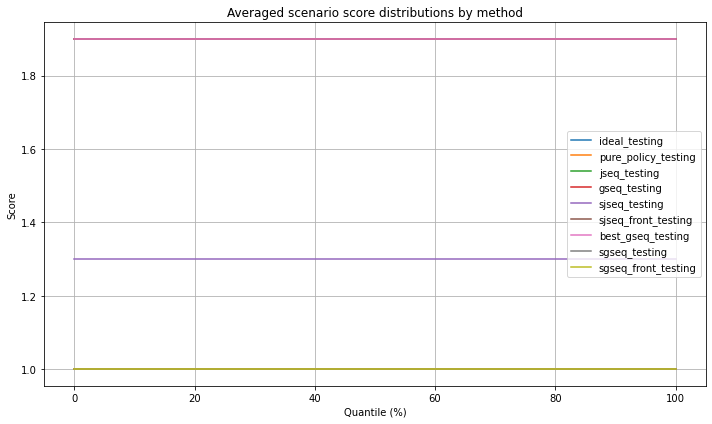

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import ast

def parse_scores(x):
    if isinstance(x, str):
        try:
            v = ast.literal_eval(x)
            return [float(y) for y in v]
        except:
            return []
    if isinstance(x, list):
        return [float(y) for y in x]
    return []

scenario_cols = [c for c in p1.columns if c.endswith("_scenario_perf")]

q = np.arange(0, 101)
plt.figure(figsize=(10,6))

for col in scenario_cols:
    method = col.replace("_scenario_perf", "")

    curves = []   # one 101-value curve per experiment

    for raw in p1[col].dropna():
        scores = parse_scores(raw)
        if len(scores) == 0:
            continue

        scores = np.sort(np.array(scores, dtype=float))
        qvals = np.percentile(scores, q)
        curves.append(qvals)

    if not curves:
        continue

    # average quantile-by-quantile
    curves = np.vstack(curves)
    avg_curve = curves.mean(axis=0)

    plt.plot(q, avg_curve, label=method)

plt.xlabel("Quantile (%)")
plt.ylabel("Score")
plt.title("Averaged scenario score distributions by method")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

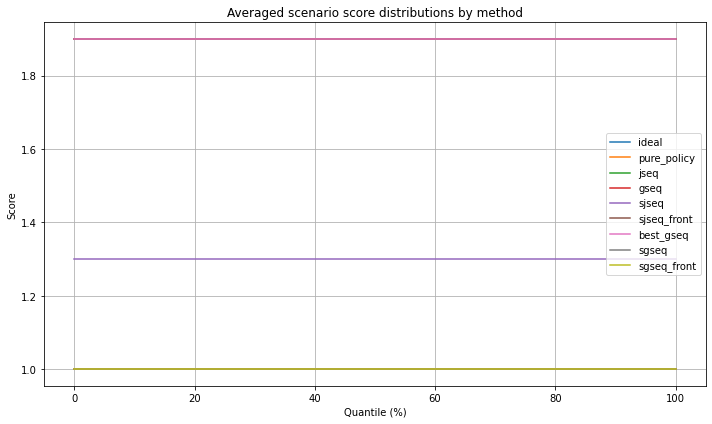


=== Averaged Quantile Values per Method (0% to 100%) ===

ideal:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

pure_policy:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

In [72]:
# store final averaged quantile curves for printing
results = {}   # method -> array of 101 quantile values
plt.figure(figsize=(10,6))

for col in scenario_cols:
    method = col.replace("_testing_scenario_perf", "")

    curves = []

    for raw in p1[col].dropna():
        scores = parse_scores(raw)
        if len(scores) == 0:
            continue

        scores = np.sort(np.array(scores, dtype=float))
        qvals = np.percentile(scores, q)
        curves.append(qvals)

    if not curves:
        continue

    curves = np.vstack(curves)
    avg_curve = curves.mean(axis=0)

    # store for printing later
    results[method] = avg_curve

    # existing plot command:
    plt.plot(q, avg_curve, label=method)
    
plt.xlabel("Quantile (%)")
plt.ylabel("Score")
plt.title("Averaged scenario score distributions by method")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# --- print final quantile values for reference ---
print("\n=== Averaged Quantile Values per Method (0% to 100%) ===")
for method, arr in results.items():
    print(f"\n{method}:")
    print(arr.tolist())   # nicer formatting


In [82]:
p1[[c for c in p1.columns if c.endswith("_training_score")]]

,ideal_training_score,pure_policy_training_score,jseq_training_score,gseq_training_score,sjseq_training_score,sjseq_front_training_score,best_gseq_training_score,sgseq_training_score,sgseq_front_training_score
0,10,10,10,10,10,10,10,10,10
1,10,10,10,10,10,10,10,10,10


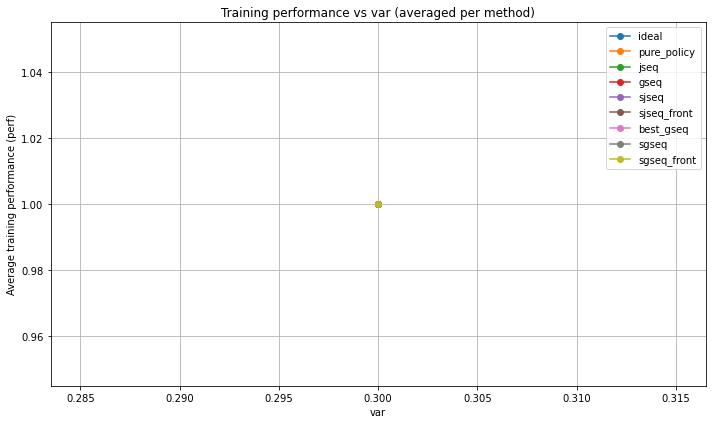


=== Averaged training performance per var ===


,ideal,pure_policy,jseq,gseq,sjseq,sjseq_front,best_gseq,sgseq,sgseq_front
var,,,,,,,,,
0.3000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [80]:
import matplotlib.pyplot as plt
import pandas as pd

training_perf_cols = [c for c in p1.columns if c.endswith("_training_perf")]

# Prepare a DataFrame for the table
table_df = pd.DataFrame()

plt.figure(figsize=(10,6))

for col in training_perf_cols:
    method = col.replace("_training_perf", "")
    
    # group by var and average
    grouped = p1.groupby("var")[col].mean().dropna()
    
    x = grouped.index.values
    y = grouped.values

    plt.plot(x, y, marker="o", label=method)
    
    # add to table_df
    table_df[method] = grouped

plt.xlabel("var")
plt.ylabel("Average training performance (perf)")
plt.title("Training performance vs var (averaged per method)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Display the table
print("\n=== Averaged training performance per var ===")
display(table_df)
